# Covid-19 Wastewater Analysis

SARS-CoV-2 has been a major public health crises for almost three years. (expand)


Wastewater data is collected..... (expand on how it's collected)

This data is valuable because it is anonymous and does not rely on individual reporting. It does not require a person to know they have the virus. Many people do not confirm their cases with a government reported test because they do not realize they have Covid19, or they take a rapid home test and do not use reporting tools on government websites, so their cases are not offically counted. This makes public health measures difficult for stakeholders to navigate. Wastewater data is valuable because  health officials can use this data to make decisions and request funding as well as plan for spikes in cases so that they can ready medical facilities for impending increases. 

The limitations of this data are... (expand on limitations and areas that don't collect, and how different cites have started collected at different times, some so recent they did not capture the January 2022 spike, which was the highest so far)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn as sns
import datetime

Our data is available on the Centers for Disease Control and Prevention (CDC) website here https://data.cdc.gov/Public-Health-Surveillance/NWSS-Public-SARS-CoV-2-Wastewater-Metric-Data/2ew6-ywp6 

In [2]:
df = pd.read_csv("NWSS_Public_SARS-CoV-2_Wastewater_Metric_Data (3).csv", lineterminator='\n', on_bad_lines="warn", low_memory=False)

In [3]:
df.head(n=100)

,wwtp_jurisdiction,wwtp_id,reporting_jurisdiction,sample_location,sample_location_specify,key_plot_id,county_names,county_fips,population_served,date_start,date_end,ptc_15d,detect_prop_15d,percentile,sampling_prior,first_sample_date
0,Arkansas,1548.0,Arkansas,Treatment plant,NaN,CDC_BIOBOT_ar_1548_Treatment plant_raw wastewater,Jefferson,05069,42323,2022-09-11,2022-09-25,NaN,100.0,100.0,no,2022-09-25
1,Arkansas,1548.0,Arkansas,Treatment plant,NaN,CDC_BIOBOT_ar_1548_Treatment plant_raw wastewater,Jefferson,05069,42323,2022-09-12,2022-09-26,NaN,100.0,100.0,no,2022-09-25
2,Arkansas,1548.0,Arkansas,Treatment plant,NaN,CDC_BIOBOT_ar_1548_Treatment plant_raw wastewater,Jefferson,05069,42323,2022-09-13,2022-09-27,-98.0,100.0,91.5,no,2022-09-25
3,Arkansas,1548.0,Arkansas,Treatment plant,NaN,CDC_BIOBOT_ar_1548_Treatment plant_raw wastewater,Jefferson,05069,42323,2022-09-14,2022-09-28,-98.0,100.0,91.5,no,2022-09-25
4,Arkansas,1548.0,Arkansas,Treatment plant,NaN,CDC_BIOBOT_ar_1548_Treatment plant_raw wastewater,Jefferson,05069,42323,2022-09-15,2022-09-29,-98.0,100.0,91.5,no,2022-09-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Indiana,1162.0,Indiana,Treatment plant,NaN,CDC_BIOBOT_in_1162_Treatment plant_raw wastewater,Hamilton,18057,98000,2022-07-01,2022-07-15,92.0,100.0,83.6,no,2022-06-01
96,Indiana,1162.0,Indiana,Treatment plant,NaN,CDC_BIOBOT_in_1162_Treatment plant_raw wastewater,Hamilton,18057,98000,2022-07-02,2022-07-16,92.0,100.0,83.6,no,2022-06-01
97,Indiana,1162.0,Indiana,Treatment plant,NaN,CDC_BIOBOT_in_1162_Treatment plant_raw wastewater,Hamilton,18057,98000,2022-07-03,2022-07-17,92.0,100.0,83.6,no,2022-06-01
98,Indiana,1162.0,Indiana,Treatment plant,NaN,CDC_BIOBOT_in_1162_Treatment plant_raw wastewater,Hamilton,18057,98000,2022-07-04,2022-07-18,8.0,100.0,77.2,no,2022-06-01


Variable Descriptions: 
wwtp_jurisdiction: US State the wastewater treatment plant in 'wwtp_id' is located	
wwtp_id: Wastewater treatment plants
reporting_jurisdiction:	The CDC ELC jurisdiction, a state, reporting the data
sample_location:Sample collection location in the wastewater system	
sample_location_specify: "Upstream" sample locations	
key_plot_id: geographic area served by sampling sites (sewersheds)	
county_names: County and county-equivalent names corresponding to the FIPS codes	
county_fips: 5-digit numberic FIP codes all counties and county-equivalents served by the sampling site	
population_served: Estimated number of persons served by the sampling site	
date_start:	The start date of the interval over which metric is calculated
date_end: The end date of the interval over which metric is calculated
ptc_15d: The percent change in SARS-CoV-2 RNA levels over the 15-day interval defined by 'date_start' and 'date_end'
detect_prop_15d: The proportion of tests with SARS-CoV-2 detected, meaning a cycle threshold (Ct) value <40 for RT-qPCR or at least 3 positive droplets/partitions for RT-ddPCR, by sewershed over the 15-day window defined by 'date_start' and "date_end'
percentile:	This metric shows whether SARS-CoV-2 virus levels at a site are currently higher or lower than past historical levels at the same site. 
sampling_prior:	Indicates whether the site was collecting wastewater samples before or on January 16, 2022.
first_sample_date: The first date samples were collected at a site.
 


In [20]:
print("The shape of the data is :",df.shape)

The shape of the data is : (361669, 16)


Changed data type of columns wwtp_id and sample_location_specify from float64 to object. 

In [17]:
change_datatype_wwtp_id = {'wwtp_id': str}
df = df.astype(change_datatype_wwtp_id)

change_datatype_sample_location_specify = {'sample_location_specify' : str}
df = df.astype(change_datatype_sample_location_specify) 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361669 entries, 0 to 361668
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   wwtp_jurisdiction        361669 non-null  object        
 1   wwtp_id                  361669 non-null  object        
 2   reporting_jurisdiction   361669 non-null  object        
 3   sample_location          361669 non-null  object        
 4   sample_location_specify  361669 non-null  object        
 5   key_plot_id              361669 non-null  object        
 6   county_names             361669 non-null  object        
 7   county_fips              361669 non-null  object        
 8   population_served        361669 non-null  int64         
 9   date_start               361669 non-null  datetime64[ns]
 10  date_end                 361669 non-null  datetime64[ns]
 11  ptc_15d                  324727 non-null  float64       
 12  detect_prop_15d 

In [19]:
df.describe()

,population_served,ptc_15d,detect_prop_15d,percentile
count,3.616690e+05,3.247270e+05,344881.000000,263534.000000
mean,1.200851e+05,3.491184e+06,92.062419,68.950996
std,2.996939e+05,8.230352e+07,21.954981,134.156220
min,9.000000e+02,-1.000000e+02,0.000000,0.000000
25%,1.120000e+04,-5.700000e+01,100.000000,32.000000
50%,3.071400e+04,0.000000e+00,100.000000,51.667000
75%,9.285000e+04,1.290000e+02,100.000000,70.000000
max,4.000000e+06,2.147484e+09,100.000000,999.000000


In [7]:
df.isnull().sum()

wwtp_jurisdiction               0
wwtp_id                      7787
reporting_jurisdiction          0
sample_location                 0
sample_location_specify    347129
key_plot_id                     0
county_names                    0
county_fips                     0
population_served               0
date_start                      0
date_end                        0
ptc_15d                     36942
detect_prop_15d             16788
percentile                  98135
sampling_prior                  0
first_sample_date               0
dtype: int64

Convert columns with dates from string object to date data type, which will let us sort and filter by date:

In [8]:
df['date_start'] = pd.to_datetime(df['date_start'])
df['date_end'] = pd.to_datetime(df['date_end'])
df['first_sample_date'] = pd.to_datetime(df['first_sample_date'])

Make sure that dates are no longer strings:

In [9]:
df.info()
# We can see they now have the Dtype 'datetime64'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361669 entries, 0 to 361668
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   wwtp_jurisdiction        361669 non-null  object        
 1   wwtp_id                  353882 non-null  float64       
 2   reporting_jurisdiction   361669 non-null  object        
 3   sample_location          361669 non-null  object        
 4   sample_location_specify  14540 non-null   float64       
 5   key_plot_id              361669 non-null  object        
 6   county_names             361669 non-null  object        
 7   county_fips              361669 non-null  object        
 8   population_served        361669 non-null  int64         
 9   date_start               361669 non-null  datetime64[ns]
 10  date_end                 361669 non-null  datetime64[ns]
 11  ptc_15d                  324727 non-null  float64       
 12  detect_prop_15d 

Covid19 cases reached a historical high, or "spike", around mid January, 2022. Many wastewater testing sides were not collecting yet at that time. We will now filter out rows that have a "first_sample_date" value that is after January 13, 2022. 

Box Plot **here**

In [10]:
spike = pd.to_datetime('1/13/2022')

In [11]:
recorded_spike = df.loc[df.first_sample_date <= spike, :] #This data frame will only include rows with collection sites that 
#were recording before the spike

did_not_record_spike = df.loc[df.first_sample_date > spike, :] #This data frame will only include rows with collection sites that do not 
#have the spike on record because they started recording afterward.

Now we check to make sure that the filters worked correctly:

In [12]:
recorded_spike.sort_values(by='first_sample_date', ascending = False).head()
#We see here that by sorting by "first_sample_date" and showing the most recent values that they have the value of 1/13/22

,wwtp_jurisdiction,wwtp_id,reporting_jurisdiction,sample_location,sample_location_specify,key_plot_id,county_names,county_fips,population_served,date_start,date_end,ptc_15d,detect_prop_15d,percentile,sampling_prior,first_sample_date
189700,Wisconsin,391.0,Wisconsin,Treatment plant,NaN,NWSS_wi_391_Treatment plant_raw wastewater,Dane,55025,33000,2022-09-13,2022-09-27,64.0,100.0,50.2,no,2022-01-13
189591,Wisconsin,391.0,Wisconsin,Treatment plant,NaN,NWSS_wi_391_Treatment plant_raw wastewater,Dane,55025,33000,2022-05-27,2022-06-10,62.0,100.0,79.8,no,2022-01-13
189599,Wisconsin,391.0,Wisconsin,Treatment plant,NaN,NWSS_wi_391_Treatment plant_raw wastewater,Dane,55025,33000,2022-06-04,2022-06-18,-65.0,100.0,70.8,no,2022-01-13
189598,Wisconsin,391.0,Wisconsin,Treatment plant,NaN,NWSS_wi_391_Treatment plant_raw wastewater,Dane,55025,33000,2022-06-03,2022-06-17,-65.0,100.0,70.8,no,2022-01-13
189597,Wisconsin,391.0,Wisconsin,Treatment plant,NaN,NWSS_wi_391_Treatment plant_raw wastewater,Dane,55025,33000,2022-06-02,2022-06-16,-63.0,100.0,70.8,no,2022-01-13


In [13]:
did_not_record_spike.sort_values(by='first_sample_date').head()
#We see here that by sorting by "first_sample_date" and showing the oldest values that the earliest "first_sample_date"
#in this group is 1/16/22, which was after the spike. This means our filters worked correctly, and our variables hold 
#the correct data. 

,wwtp_jurisdiction,wwtp_id,reporting_jurisdiction,sample_location,sample_location_specify,key_plot_id,county_names,county_fips,population_served,date_start,date_end,ptc_15d,detect_prop_15d,percentile,sampling_prior,first_sample_date
335959,Ohio,74.0,Ohio,Treatment plant,NaN,NWSS_oh_74_Treatment plant_raw wastewater,Crawford,39033,12362,2022-10-10,2022-10-24,-18.0,100.0,83.8,no,2022-01-16
335905,Ohio,74.0,Ohio,Treatment plant,NaN,NWSS_oh_74_Treatment plant_raw wastewater,Crawford,39033,12362,2022-08-17,2022-08-31,-90.0,100.0,69.8,no,2022-01-16
335906,Ohio,74.0,Ohio,Treatment plant,NaN,NWSS_oh_74_Treatment plant_raw wastewater,Crawford,39033,12362,2022-08-18,2022-09-01,-90.0,100.0,69.8,no,2022-01-16
335907,Ohio,74.0,Ohio,Treatment plant,NaN,NWSS_oh_74_Treatment plant_raw wastewater,Crawford,39033,12362,2022-08-19,2022-09-02,-90.0,100.0,69.8,no,2022-01-16
335908,Ohio,74.0,Ohio,Treatment plant,NaN,NWSS_oh_74_Treatment plant_raw wastewater,Crawford,39033,12362,2022-08-20,2022-09-03,-90.0,100.0,69.8,no,2022-01-16


In [14]:
did_not_record_spike.describe()

,wwtp_id,sample_location_specify,population_served,ptc_15d,detect_prop_15d,percentile
count,144612.000000,10729.000000,1.488070e+05,1.314310e+05,140057.000000,139882.000000
mean,849.609445,91.854600,1.226261e+05,5.723503e+06,92.190251,82.451728
std,385.337105,42.653945,2.913955e+05,1.063538e+08,21.703091,174.060921
min,36.000000,16.000000,9.000000e+02,-1.000000e+02,0.000000,0.000000
25%,603.000000,68.000000,1.105700e+04,-5.100000e+01,100.000000,33.333000
50%,845.000000,86.000000,3.000000e+04,0.000000e+00,100.000000,52.000000
75%,1160.000000,129.000000,9.000000e+04,1.100000e+02,100.000000,69.600000
max,1652.000000,171.000000,4.000000e+06,2.147484e+09,100.000000,999.000000


In [15]:
recorded_spike.describe()

,wwtp_id,sample_location_specify,population_served,ptc_15d,detect_prop_15d,percentile
count,209270.000000,3811.000000,2.128620e+05,1.932960e+05,204824.000000,123652.000000
mean,433.920791,61.262923,1.183088e+05,1.973326e+06,91.975008,53.678218
std,348.608911,40.793181,3.053493e+05,6.068880e+07,22.125198,60.373040
min,1.000000,2.000000,2.273000e+03,-1.000000e+02,0.000000,0.000000
25%,163.000000,7.000000,1.120000e+04,-6.000000e+01,100.000000,30.600000
50%,329.000000,84.000000,3.225500e+04,0.000000e+00,100.000000,51.333000
75%,800.000000,95.000000,9.500000e+04,1.430000e+02,100.000000,70.800000
max,1434.000000,99.000000,4.000000e+06,2.147484e+09,100.000000,999.000000


What percent of these sites have been collecting samples since before the spike? First we have to find out how many unique testing locations are in each group- those that recorded the spike and those that didnt:

In [16]:
print('Unique testing locations that have been recording since before the spike: ',len(recorded_spike['wwtp_id'].unique().tolist()))
print()
print('Unique testing locations that have been recording since after the spike: ',len(did_not_record_spike['wwtp_id'].unique().tolist()))

Unique testing locations that have been recording since before the spike:  367

Unique testing locations that have been recording since before the spike:  787


As we can see, we have 367 testing sites that recorded before the spike.

Pie chart **here** w/labels that represent those numbers 

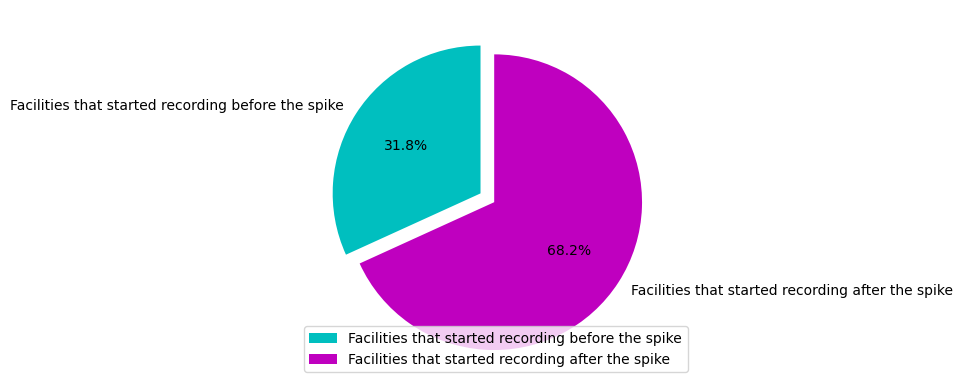

In [27]:
y = np.array([367, 787])
mylabels = ["Facilities that started recording before the spike", "Facilities that started recording after the spike"]
myexplode = [.01, 0.1]
mycolors = ["c", "m"]

plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, startangle = 90, autopct='%1.1f%%')
plt.legend()
plt.show()

Now we will look at the most recent test results, starting with October 1, 2022.

In [84]:
recent = pd.to_datetime('10/01/2022') #defining "recent" as October 1st, 2022

We will create a data frame for recent tests from the sites that did record the spike:

In [94]:
recent_test_recorded_spike = recorded_spike.loc[recorded_spike.date_start >= recent, :] 

Now we will create a data frame for recent tests from the sites that did not record the spike:

In [95]:
recent_test_did_not_record_spike = did_not_record_spike.loc[did_not_record_spike.date_start >= recent, :]

Question: Did not recording the very high case counts during the spike affect the percentile values for testing sites that did not record high case counts previously? 

In [104]:
print('Recent percentile mean for sites that did record the spike: ',recent_test_recorded_spike.percentile.mean())
print()
print('We can see that for testing sites that recorded very high values previously that current levels are still quite \
low in comparison')

Recent percentile mean for sites that did record the spike:  41.749500294348444

We can see that for testing sites that recorded very high values previously that current levels are still quite low in comparison


In [107]:
print('Recent percentile mean for sites that did not record the spike: ',recent_test_did_not_record_spike.percentile.mean())
print()
print('We can see that for testing sites that did not record very high values previously that current levels \
are quite high in comparison')

Recent percentile mean for sites that did not record the spike:  118.93582263735414

We can see that for testing sites that did not record very high values previously that current levels are quite high in comparison
